# SVM

1. Using the data set of two examination results design a predictor using logistic regression for predicting whether a student can get an admission in the institution. Use regularizer to further tune the parameters.  Use 70 % data for training and rest 30% data for testing your predictor and calculate the efficiency of the predictor/hypothesis.

    Hints: 	
    1. You can pre process  the data for convenience.
    2. You must use Python program for evaluating parameters using batch gradient descent algorithm (GDA). 
       No function should be used for GDA.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Read the data

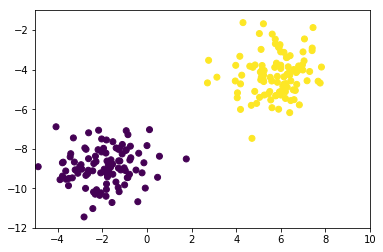

In [23]:
from sklearn.datasets.samples_generator import make_blobs

(X,y) =  make_blobs(n_samples=200,n_features=2,centers=2,cluster_std=1.05,random_state=40)
#we need to add 1 to X values (we can say its bias)

plt.scatter(X[:,0],X[:,1],marker='o',c=y)
plt.axis([-5,10,-12,-1])
plt.show()

### Normalize the data

In [24]:
y = y.reshape(-1,1)
n = np.where(y == 0)
y[n,0] = -1

mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X- mean) / std
x = np.insert(X, 0, 1,axis = 1)


### Split the data to train & test (70 - 30 split)

In [25]:
d = int(y.shape[0] * 0.7)

xtrain = x[:d]
xtest = x[d:]
ytrain = y[:d]
ytest = y[d:]

### Cost function

In [97]:
def cost(x,y,w,c):
    h =  c * np.sum( (1 - y * (np.matmul(x,w))).clip(min=0) )
    return (h +  np.dot(w.T,w)[0,0])
w = np.zeros((3,1))
cost(x,y,w,0.2)


40.0

### Gradient descent 

In [157]:
def gradient_descent(x, y, alpha, lamb, iterations):
    m = y.shape[0]
    cost_list = []
    grad_list = []
    w = np.zeros((x.shape[1],1))
    for i in range(1,iterations):
        p =  np.where(y * (np.matmul(x,w)) < 1)[0]
        h = ((x[p,:] * y[p,:]).sum(axis = 0)).reshape(-1,1)
        w1 = np.array(w,copy=True)
        w1[0,0]= 0
        grad = h - (lamb) * w1
        grad_list.append(grad)
        w = w + (alpha) * grad
        
        cost_list.append(cost(x,y,w,lamb))
    return cost_list, grad_list, w

### Calling GD with alpha = 0.01 and iterations = 100

In [192]:
cost_list, grad_list, w = gradient_descent(xtrain, ytrain, 0.01, 10, 1000)

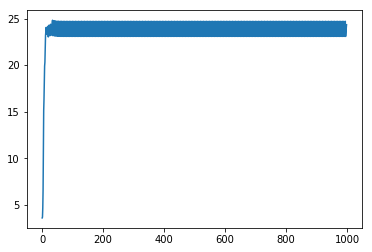

In [193]:
plt.plot(cost_list)


### Drawing decision boundary

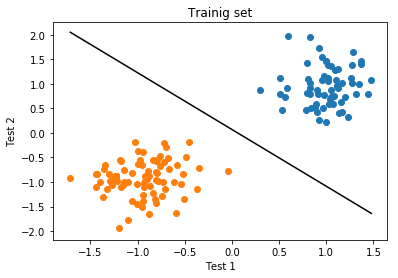

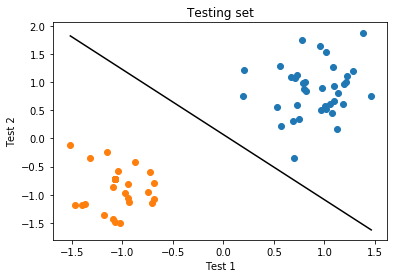

In [194]:
def plot(X,Y,w,title):
    p = np.where(Y > 0)
    n = np.where(Y <= 0)
    plt.title(title)
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.scatter(X[p,1], X[p,2])
    plt.scatter(X[n,1], X[n,2])
    #print(n)
    linex = [min(X[:,1]),max(X[:,1])]
    liney = [(-w[0,0] -w[1,0] * i)/w[2,0] for i in linex]
    plt.plot(linex, liney,'k')
    plt.show()
#plot(x,y,w,'Full data set')
plot(xtrain,ytrain,w,'Trainig set')
plot(xtest,ytest,w,'Testing set')

In [206]:
def avg_error(x, y, w):
    h = np.dot(x, w) > 0
    e = np.abs(h - y.clip(min = 0)).sum()
    #print(h.T)
    #print(y.T)
    #print(h - y.clip(min = 0))
    return (e)

In [207]:
avg_error(x,y,w)

0

In [208]:
cost(xtest,ytest,w,5)

12.072814714637007

In [178]:
w

array([[-1.07      ],
       [ 1.35044515],
       [ 1.31532285]])

In [179]:
p =  np.where(y * (np.matmul(x,w)) < 0) [0]
h = (x[p,:] * y[p,:]).sum(axis = 0)
h

array([ 2.        ,  1.26015682, -0.12706576])

In [180]:
p

array([153, 155])